# Importing required Libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Reading the Train dataset

In [2]:
train_ds=pd.read_csv('./train.csv')

In [3]:
print(train_ds.head(5))
print(train_ds.shape)

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         

In [4]:
label=train_ds['label']
label.shape

(42000,)

In [5]:
train=train_ds.drop("label",axis=1)
train.shape

(42000, 784)

# Data Preprocessing: Standardizing the data:

In [6]:
from sklearn.preprocessing import StandardScaler

standardized_data = StandardScaler().fit_transform(train)
print(standardized_data.shape)

(42000, 784)


# Co-variance Matrix

In [7]:
sample_data = standardized_data

covar_matrix = np.matmul(sample_data.T , sample_data)

print ( "The shape of variance matrix = ", covar_matrix.shape)

The shape of variance matrix =  (784, 784)


# Eigen-values and Eigen-vectors :

In [8]:
from scipy.linalg import eigh 

values, vectors = eigh(covar_matrix, eigvals=(782,783))

print("Shape of eigen vectors = ",vectors.shape)
vectors = vectors.T
print("Updated shape of eigen vectors = ",vectors.shape)

Shape of eigen vectors =  (784, 2)
Updated shape of eigen vectors =  (2, 784)


In [9]:
new_coordinates = np.matmul(vectors, sample_data.T)
print (" resultanat new data points' shape ", vectors.shape, "*", sample_data.T.shape," = ", new_coordinates.shape)

 resultanat new data points' shape  (2, 784) * (784, 42000)  =  (2, 42000)


In [10]:
new_coordinates = np.vstack((new_coordinates, label)).T

# creating a new data frame for ploting the labeled points.
dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))
print(dataframe.head())

   1st_principal  2nd_principal  label
0      -5.226445      -5.140478    1.0
1       6.032996      19.292332    0.0
2      -1.705813      -7.644503    1.0
3       5.836139      -0.474207    4.0
4       6.024818      26.559574    0.0


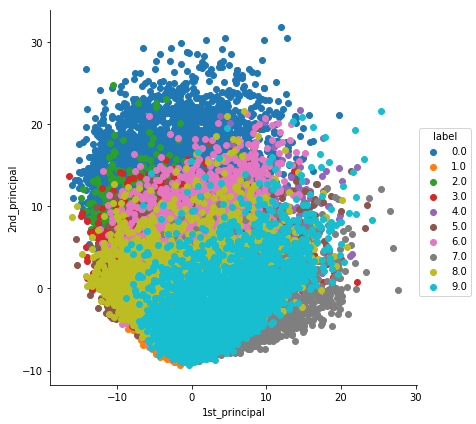

In [11]:
# ploting the 2d data points with seaborn
import seaborn as sn
sn.FacetGrid(dataframe, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

In [12]:
# initializing the pca
from sklearn import decomposition
pca = decomposition.PCA()


In [13]:
# configuring the parameteres
# the number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)



shape of pca_reduced.shape =  (42000, 2)


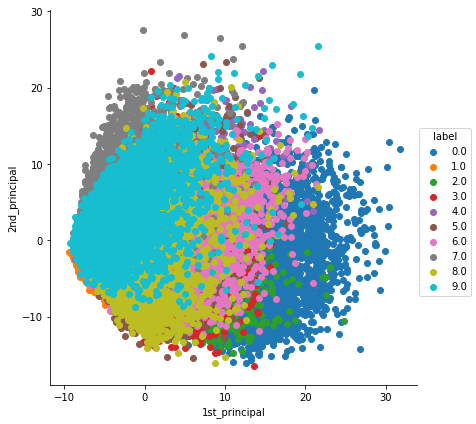

In [14]:
# attaching the label for each 2-d data point 
pca_data = np.vstack((pca_data.T, label)).T

# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(pca_df, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

# T-SNE

In [15]:
from sklearn.manifold import TSNE

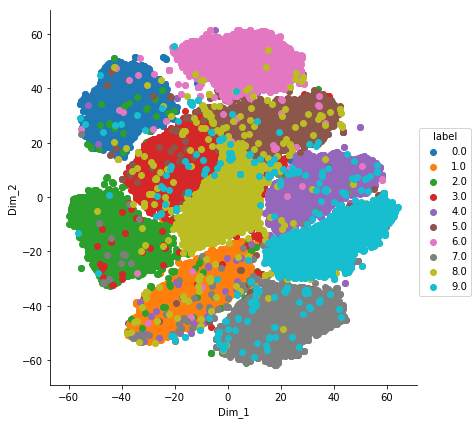

In [19]:

model = TSNE(n_components=2, random_state=0)
tsne_data = model.fit_transform(train)


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, label)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

In [ ]:
model = TSNE(n_components=2, random_state=0, perplexity=50)
tsne_data = model.fit_transform(train) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, label)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50')
plt.show()

In [ ]:
model = TSNE(n_components=2, random_state=0, perplexity=50,  n_iter=5000)
tsne_data = model.fit_transform(train) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, label)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50, n_iter=5000')
plt.show()